# **Building a CNN model to classify Flower image dataset**

## **Import libraries, dataset and read data**

Connect google drive to fetch dataset.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Importing necessary libraries -
- os for using operating system functionality
- cv2 for reading image
- gc for garbage collection
- numpy for mathmatical operations
- matplotlib for plotting graphs and showing images
- tqdm for visualizing progess
- tensorflow for model creation and training
- sklearn.model_selection for data splitting

In [2]:
import os
import cv2
import random
import gc
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Training requires lots of ram. To keep the memory a little more free, garbage collector called after each epoch to clean up unnecessary data.

In [3]:
gc.collect()

class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

In [4]:
DATA_DIR = '/content/drive/My Drive/flowers'

In [5]:
CATEGORIES = []

for i in os.listdir(DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['sunflower', 'rose', 'tulip', 'dandelion', 'daisy']


Visualizing raw inputs. 10 image from every category.

In [6]:
# import cv2

# i = 0
# plt.figure(figsize=(20, 8))
# for c in CATEGORIES:
#   path = os.path.join(DATA_DIR, c)
#   for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path,img))
#         plt.subplot(5,10,i+1)
#         plt.imshow(img_array)
#         if i%10 == 0:
#             plt.ylabel(c)
#         plt.xticks([])
#         plt.yticks([])
#         i += 1
#         if i%10 == 0:
#             break

# plt.tight_layout()        
# plt.show()


## **My Model**

Image resizing

In [151]:
train_data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (128, 128))
            train_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(train_data))

100%|██████████| 764/764 [00:05<00:00, 139.82it/s]

4317


Visualizing data after resizing

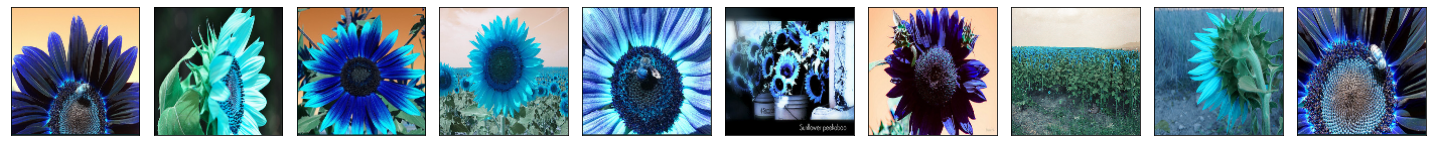

In [152]:
i = 0
plt.figure(figsize=(20, 8))
for img in train_data:
  plt.subplot(1,10,i+1)
  plt.imshow(img[0])
  plt.xticks([])
  plt.yticks([])
  i += 1
  if i%10 == 0:
      break

plt.tight_layout()        
plt.show()

Shuffling data to reduce overfitting

In [153]:
random.shuffle(train_data)

Differentiating image array and labels

In [154]:
x = []
y = []

for img, label in train_data:
    x.append(img)
    y.append(label)
    
x = np.array(x).astype('float32').reshape(-1, 128, 128, 3)
y = np.array(y)

print(f"x= {x.shape} y= {y.shape}")

x= (4317, 128, 128, 3) y= (4317,)


In [155]:
# pickle_out = open("/content/drive/My Drive/x.pickle","wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()

# pickle_out = open("/content/drive/My Drive/y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [156]:
# pickle_in = open("/content/drive/My Drive/x.pickle", 'rb')
# x = pickle.load(pickle_in)
# pickle_in = open("/content/drive/My Drive/y.pickle", 'rb')
# y = pickle.load(pickle_in)

# print(f"img_shape: {x.shape}")
# print(f"label_shape: {y.shape}")

Splitting all images into train and test sets

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

#### Image preprocessing

Calculating mean image

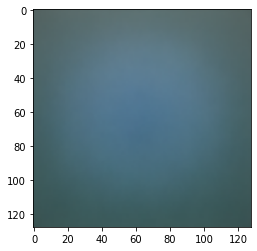

In [158]:
mean_img = np.mean(x, axis=0)
plt.imshow(mean_img.astype('uint8'))

Subtracting every image from mean image and visualize first five of them

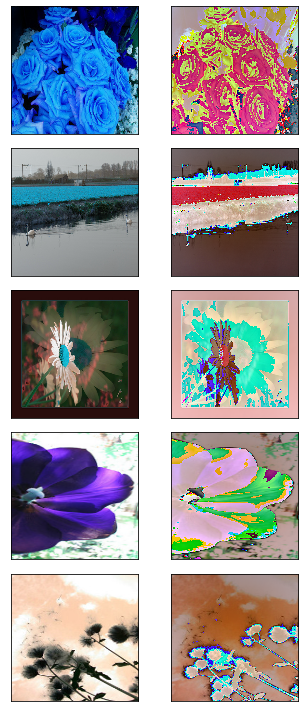

In [159]:
X_train_norm = X_train-mean_img
X_test_norm = X_test-mean_img

c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

Defining model

In [160]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), padding="Valid"),

    layers.Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), padding="Valid"),

    layers.Conv2D(filters=96, kernel_size=(3,3), padding="Same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), padding="Valid"),

    layers.Conv2D(filters=96, kernel_size=(3,3), padding="Same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2), padding="Valid"),
    layers.Dropout(0.5),

    layers.Flatten(),
    
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(5, activation="softmax")
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 16, 16, 96)     

Compiling the model

In [161]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#### Layer Visualization

In [162]:
layer = model.layers
layer_names = []
for l in range(len(layer)):
    if "max" in layer[l].name or "conv2d" in layer[l].name:
      layer_names.append(layer[l].name)
        
layer_outputs = [layer.output for layer in model.layers]
print(layer_outputs)

[<KerasTensor: shape=(None, 128, 128, 32) dtype=float32 (created by layer 'conv2d_54')>, <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'max_pooling2d_54')>, <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'conv2d_55')>, <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'max_pooling2d_55')>, <KerasTensor: shape=(None, 32, 32, 96) dtype=float32 (created by layer 'conv2d_56')>, <KerasTensor: shape=(None, 16, 16, 96) dtype=float32 (created by layer 'max_pooling2d_56')>, <KerasTensor: shape=(None, 16, 16, 96) dtype=float32 (created by layer 'conv2d_57')>, <KerasTensor: shape=(None, 8, 8, 96) dtype=float32 (created by layer 'max_pooling2d_57')>, <KerasTensor: shape=(None, 8, 8, 96) dtype=float32 (created by layer 'dropout_41')>, <KerasTensor: shape=(None, 6144) dtype=float32 (created by layer 'flatten_12')>, <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_24')>, <KerasTensor: shape=(None, 512) dtype=f

In [163]:
model_short = keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)

In [164]:
feature_map_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

In [165]:
from keras.preprocessing.image import load_img, img_to_array

img = load_img("/content/drive/My Drive/flowers/rose/145862135_ab710de93c_n.jpg", target_size=(128, 128))
img = img_to_array(img)
img = np.array(img).astype('float32').reshape(-1, 128, 128, 3)
img /= 255.0
print(type(img))  
print(img.shape)

<class 'numpy.ndarray'>
(1, 128, 128, 3)


In [166]:
features = model_short.predict(img)
print(features.shape)

(1, 64, 64, 32)


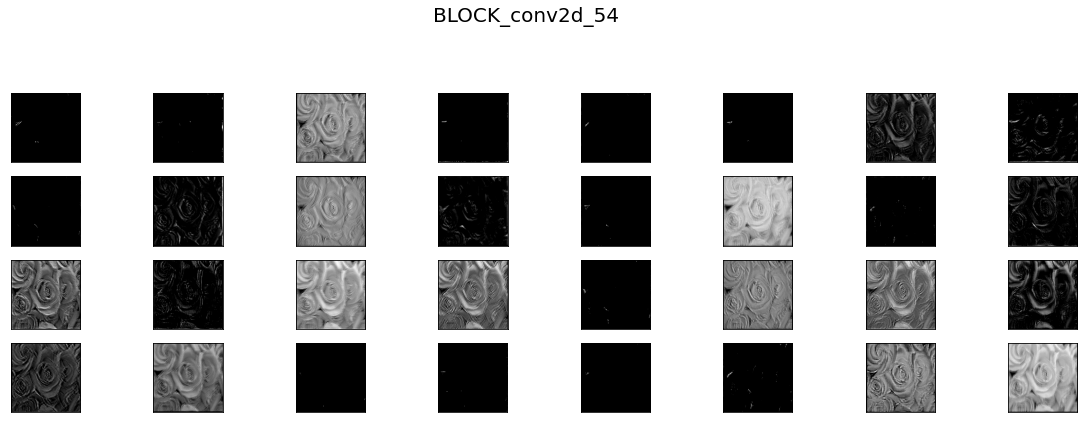

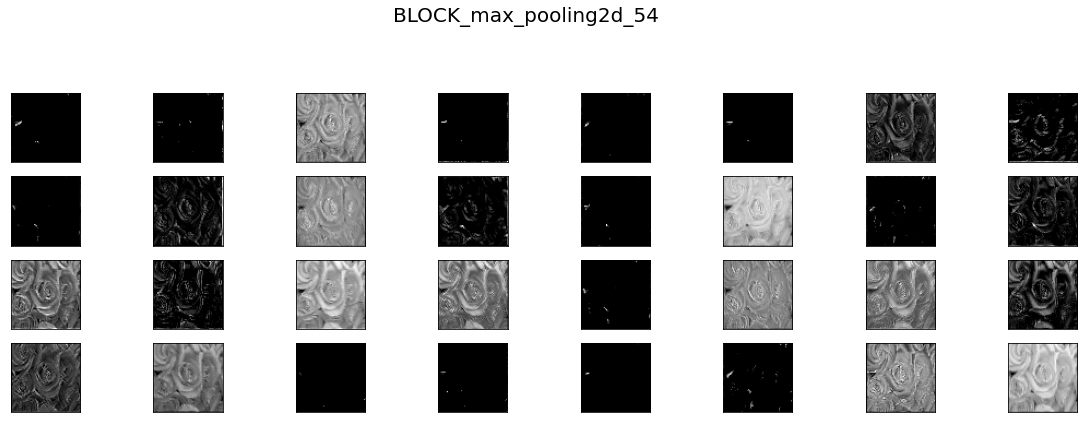

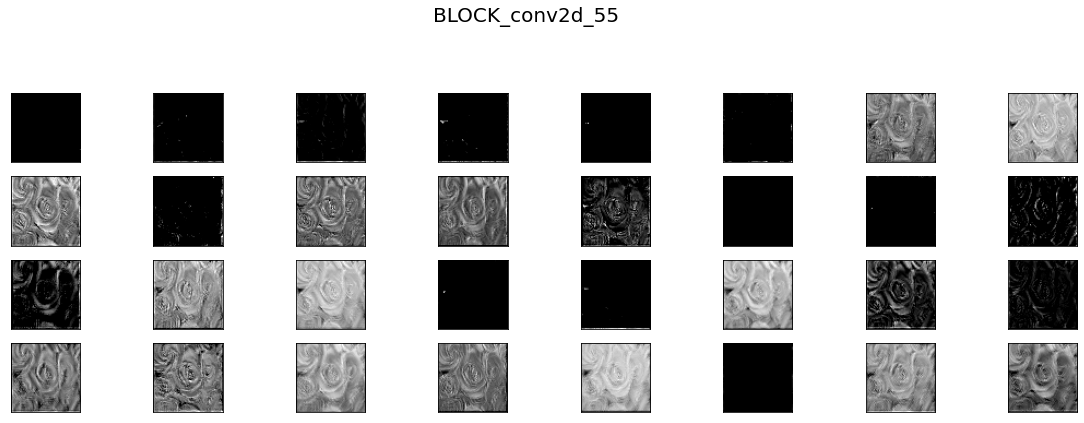

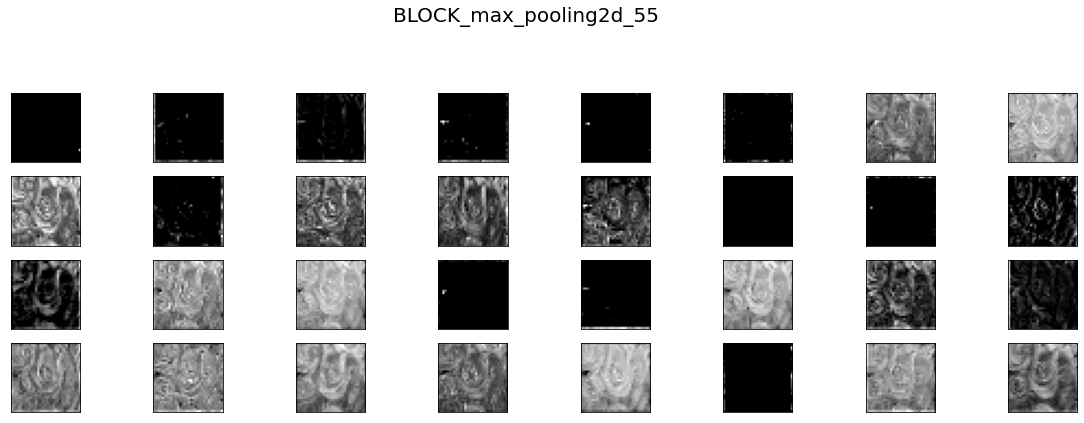

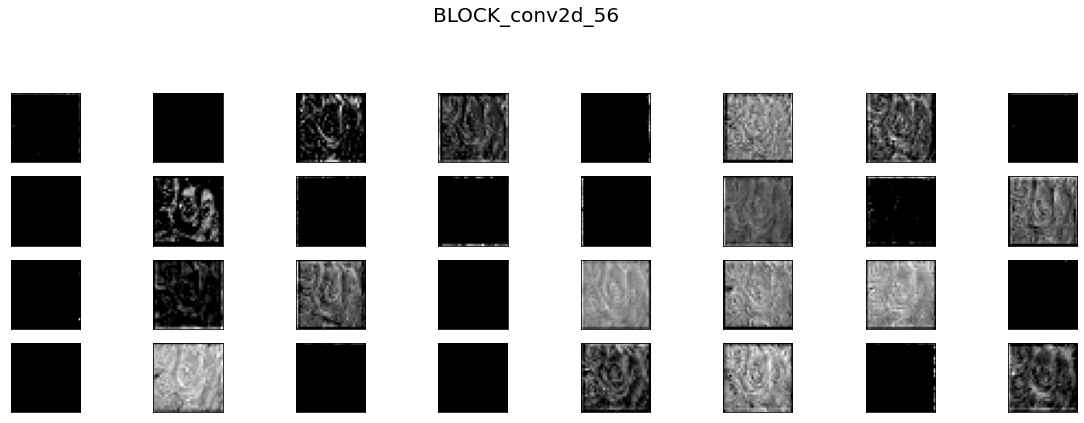

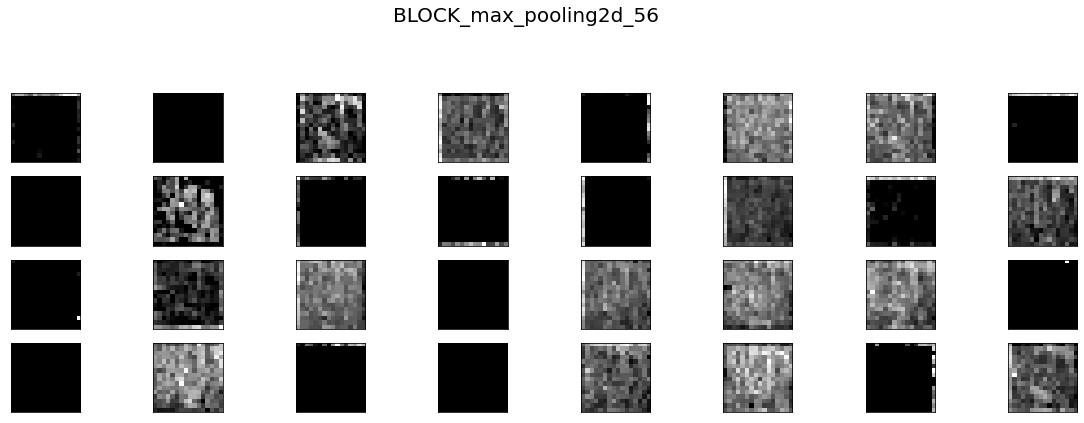

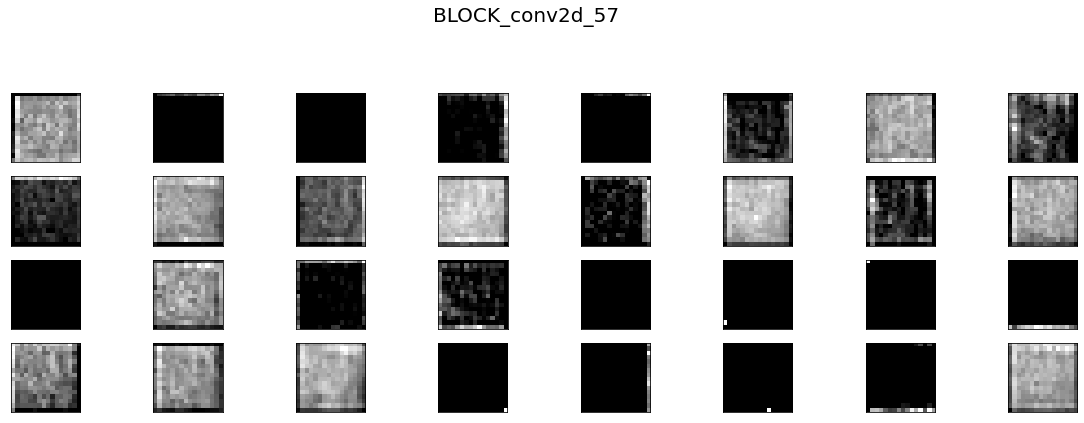

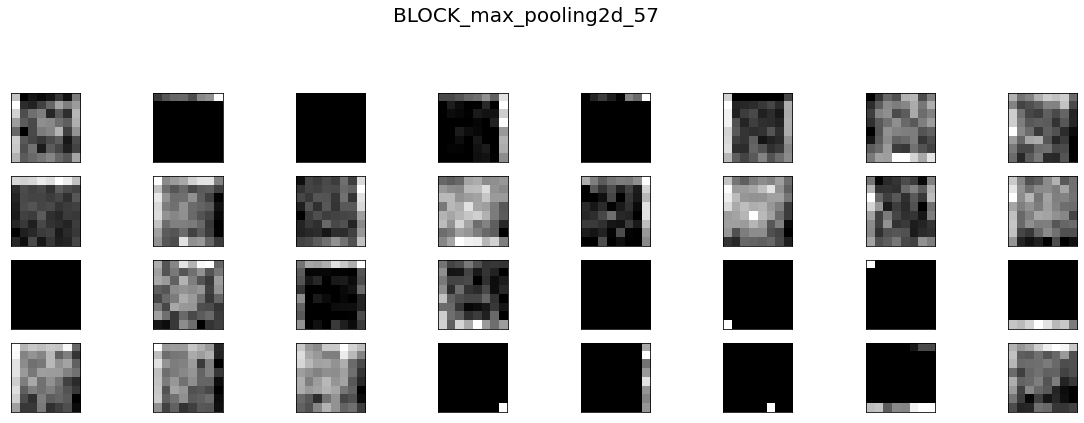

In [167]:
feature_maps = feature_map_model.predict(img)

for i, fmap in zip(layer_names, feature_maps):
  fig = plt.figure(figsize=(20,12))
  fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
  for i in range(1, features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

#### Training and testing

In [168]:
cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.02, patience=10, restore_best_weights=True)
h = model.fit(x=X_train_norm, y=Y_train, epochs=50, validation_split=0.2, batch_size=256, callbacks=[cb]) # batch size = how many images will train per time

Epoch 1/50
11/11 [==============================] - 11s 699ms/step - loss: 17.1349 - accuracy: 0.2324 - val_loss: 3.2435 - val_accuracy: 0.3068
Epoch 2/50
11/11 [==============================] - 3s 289ms/step - loss: 5.5790 - accuracy: 0.2802 - val_loss: 1.5953 - val_accuracy: 0.3907
Epoch 3/50
11/11 [==============================] - 3s 288ms/step - loss: 2.9285 - accuracy: 0.3132 - val_loss: 1.4449 - val_accuracy: 0.3821
Epoch 4/50
11/11 [==============================] - 3s 287ms/step - loss: 2.0177 - accuracy: 0.3429 - val_loss: 1.3689 - val_accuracy: 0.4443
Epoch 5/50
11/11 [==============================] - 3s 288ms/step - loss: 1.7469 - accuracy: 0.3581 - val_loss: 1.3465 - val_accuracy: 0.4284
Epoch 6/50
11/11 [==============================] - 3s 281ms/step - loss: 1.6236 - accuracy: 0.3755 - val_loss: 1.3294 - val_accuracy: 0.4588
Epoch 7/50
11/11 [==============================] - 3s 286ms/step - loss: 1.5055 - accuracy: 0.3997 - val_loss: 1.3182 - val_accuracy: 0.4660
Epoc

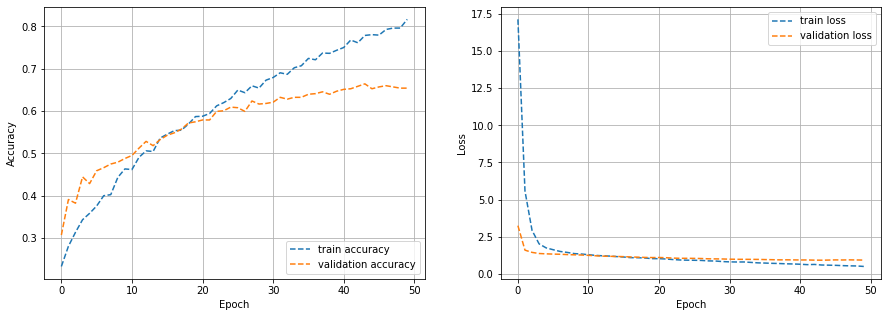

In [169]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [170]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

27/27 [==============================] - 1s 17ms/step - loss: 0.8855 - accuracy: 0.6609

Test Accuracy: 0.6608796119689941

Test Loss: 0.8855273723602295


In [171]:
model.save('/content/drive/My Drive/my_model.h5')

## **Using Alexnet**

Image resizing

In [9]:
train_data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (227, 227))
            train_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(train_data))

100%|██████████| 764/764 [00:12<00:00, 62.49it/s] 

4317


Visualizing data after resizing

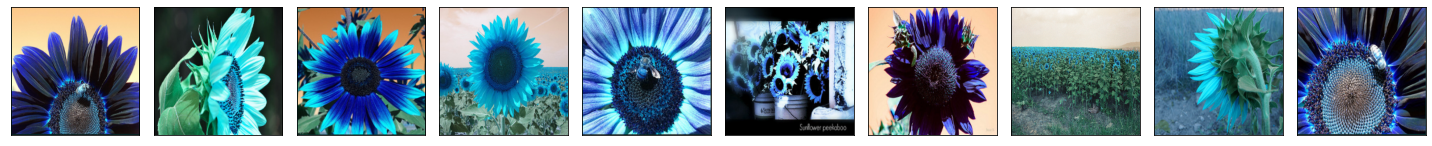

In [10]:
i = 0
plt.figure(figsize=(20, 8))
for img in train_data:
  plt.subplot(1,10,i+1)
  plt.imshow(img[0])
  plt.xticks([])
  plt.yticks([])
  i += 1
  if i%10 == 0:
      break

plt.tight_layout()        
plt.show()

Shuffling data to reduce overfitting

In [11]:
random.shuffle(train_data)

Differentiating image array and labels

In [12]:
x = []
y = []

for img, label in train_data:
    x.append(img)
    y.append(label)
    
x = np.array(x).astype('float32').reshape(-1, 227, 227, 3)
y = np.array(y)

print(f"x= {x.shape} y= {y.shape}")

x= (4317, 227, 227, 3) y= (4317,)


In [10]:
# pickle_out = open("/content/drive/My Drive/x.pickle","wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()

# pickle_out = open("/content/drive/My Drive/y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

In [11]:
# pickle_in = open("/content/drive/My Drive/x.pickle", 'rb')
# x = pickle.load(pickle_in)
# pickle_in = open("/content/drive/My Drive/y.pickle", 'rb')
# y = pickle.load(pickle_in)

# print(f"img_shape: {x.shape}")
# print(f"label_shape: {y.shape}")

Splitting all images into train and test sets

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 0)

#### Image preprocessing and model creating

Calculating mean image

// The mean image is very unclear and it doesn't look like a flower. It means there are lots of variations in our dataset.

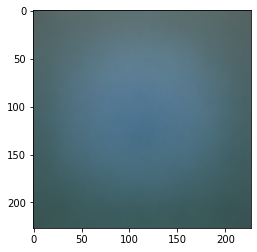

In [14]:
mean_img = np.mean(x, axis=0)
plt.imshow(mean_img.astype('uint8'))

Subtracting every image from mean image and visualize first five of them

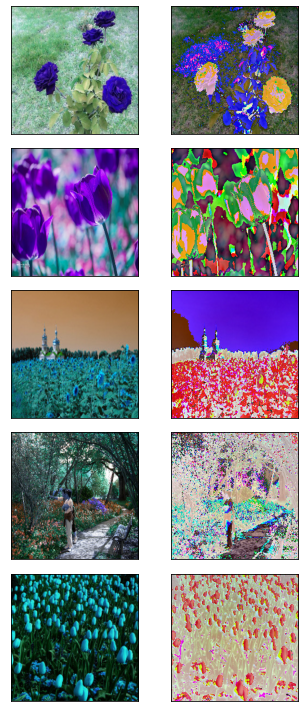

In [15]:
X_train_norm = X_train-mean_img

c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

Defining **alexnet** model

In [16]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

Compiling the model

In [17]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#### Layer Visualization

In [18]:
layer = model.layers
layer_names = []
for l in range(len(layer)):
    if "max" in layer[l].name or "conv2d" in layer[l].name:
      layer_names.append(layer[l].name)
        
layer_outputs = [layer.output for layer in model.layers]
print(layer_outputs)

[<KerasTensor: shape=(None, 55, 55, 96) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 55, 55, 96) dtype=float32 (created by layer 'activation')>, <KerasTensor: shape=(None, 27, 27, 96) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 27, 27, 96) dtype=float32 (created by layer 'batch_normalization')>, <KerasTensor: shape=(None, 17, 17, 256) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 17, 17, 256) dtype=float32 (created by layer 'activation_1')>, <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'batch_normalization_1')>, <KerasTensor: shape=(None, 6, 6, 384) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 6, 6, 384) dtype=float32 (created by layer 'activation_2')>, <KerasTensor: shape=(None, 6, 6, 384) dtype=float32 (created by layer 'batch_normalization_2')>, <KerasTens

In [27]:
model_short = keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)

In [20]:
feature_map_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

In [28]:
from keras.preprocessing.image import load_img, img_to_array

img = load_img("/content/drive/My Drive/flowers/rose/145862135_ab710de93c_n.jpg", target_size=(227, 227))
img = img_to_array(img)
img = np.array(img).astype('float32').reshape(-1, 227, 227, 3)
img /= 255.0
print(type(img))  
print(img.shape)                       

# plt.imshow(img)

<class 'numpy.ndarray'>
(1, 227, 227, 3)


In [31]:
features = model_short.predict(img)
print(features.shape)

(1, 55, 55, 96)


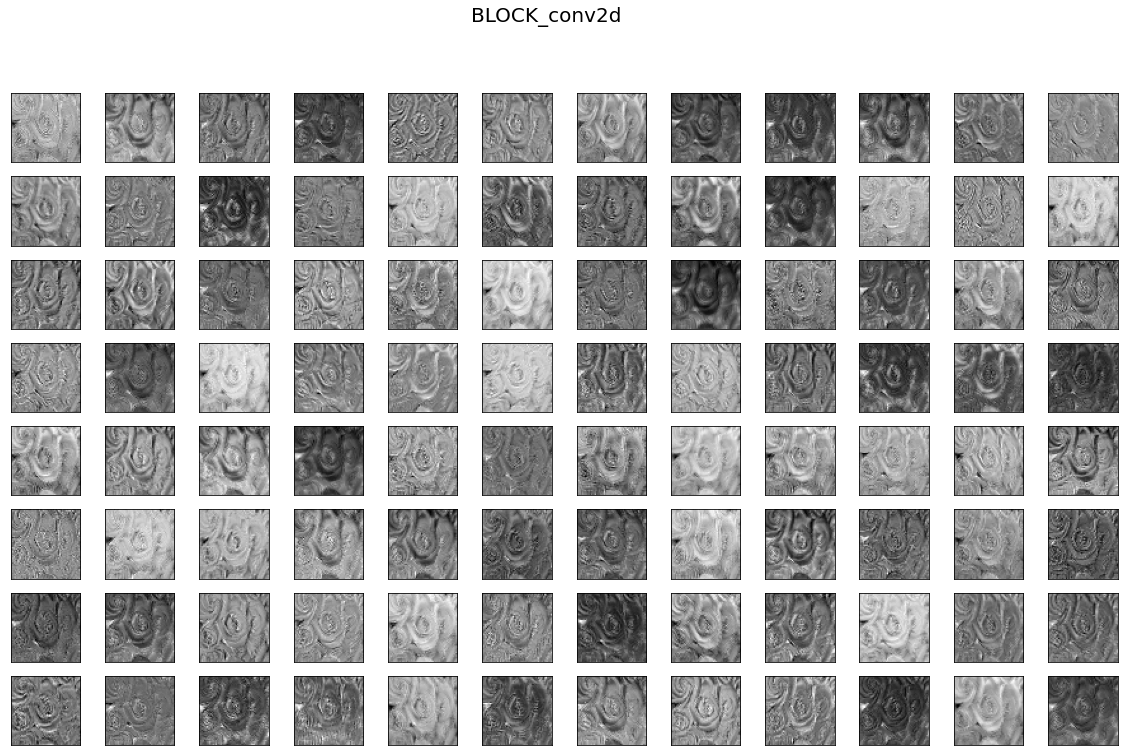

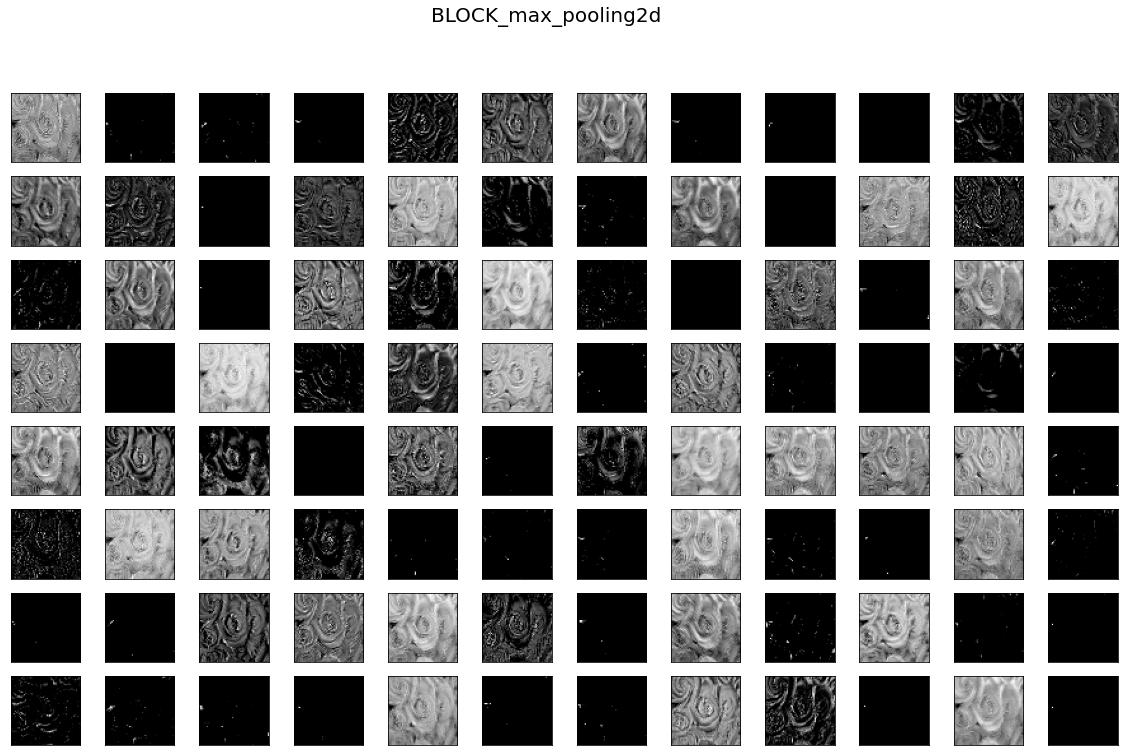

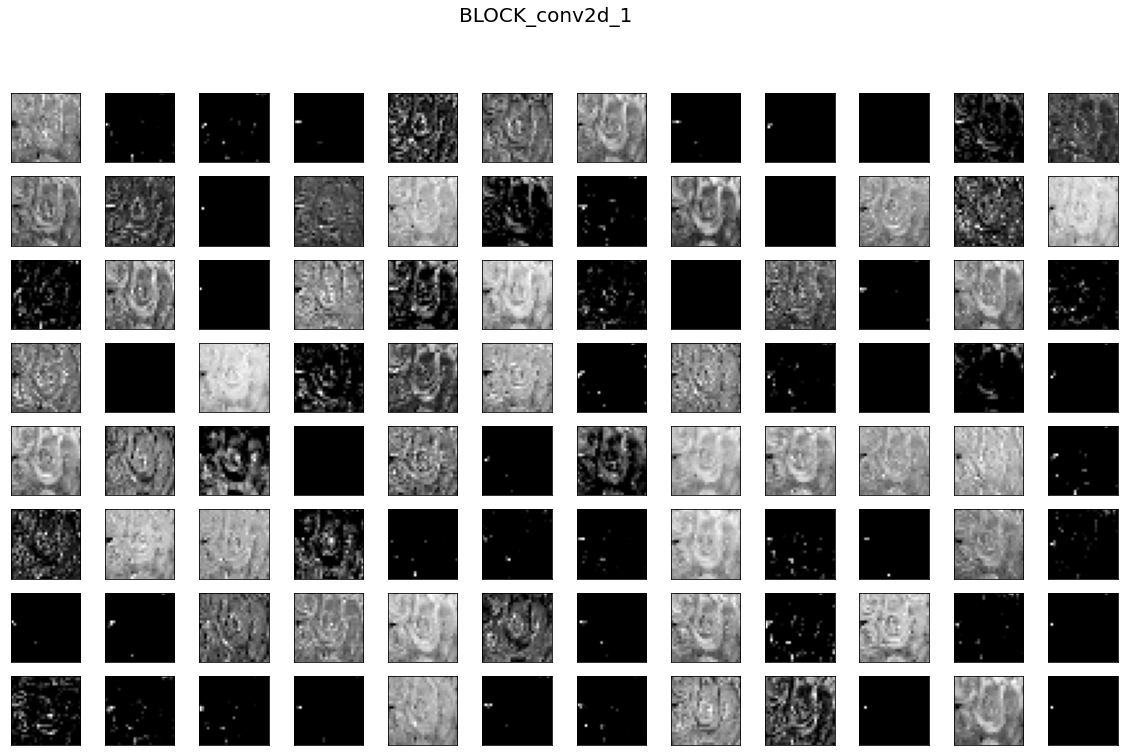

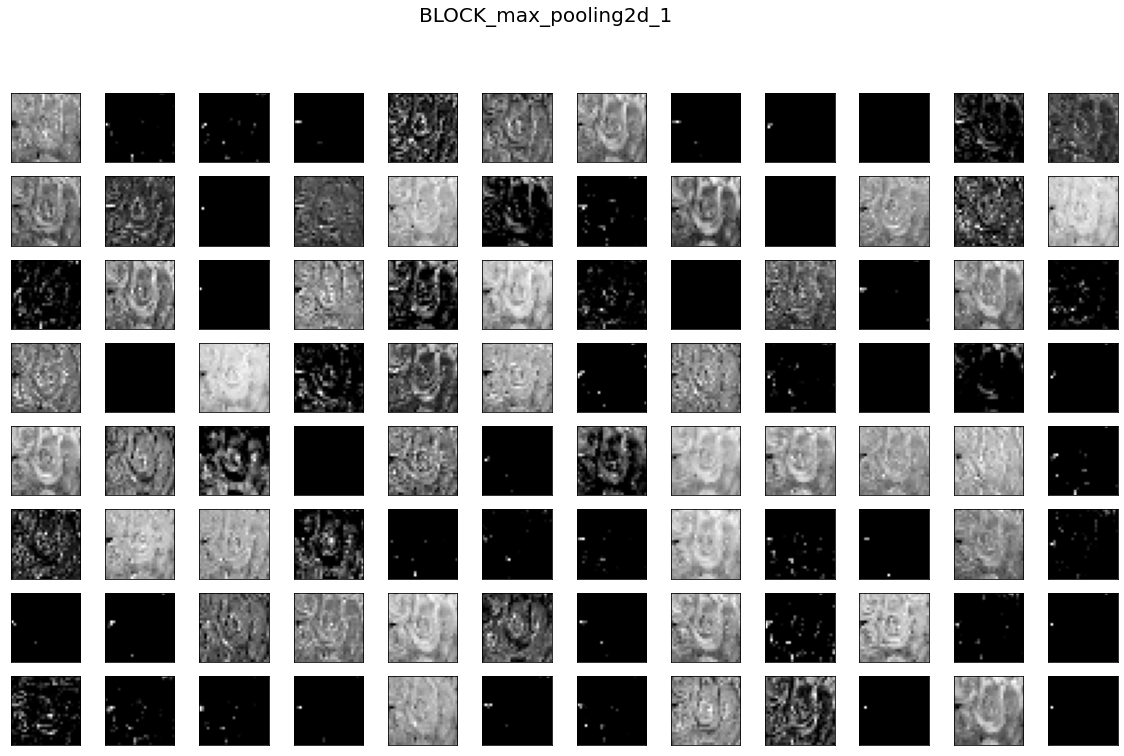

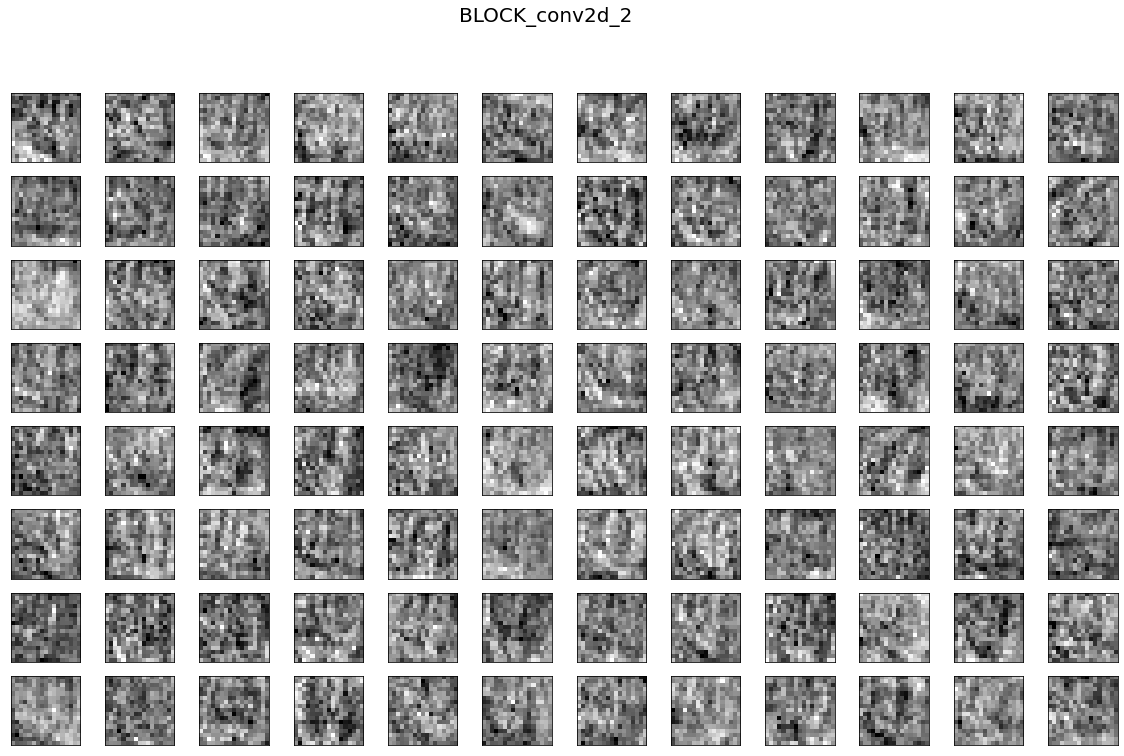

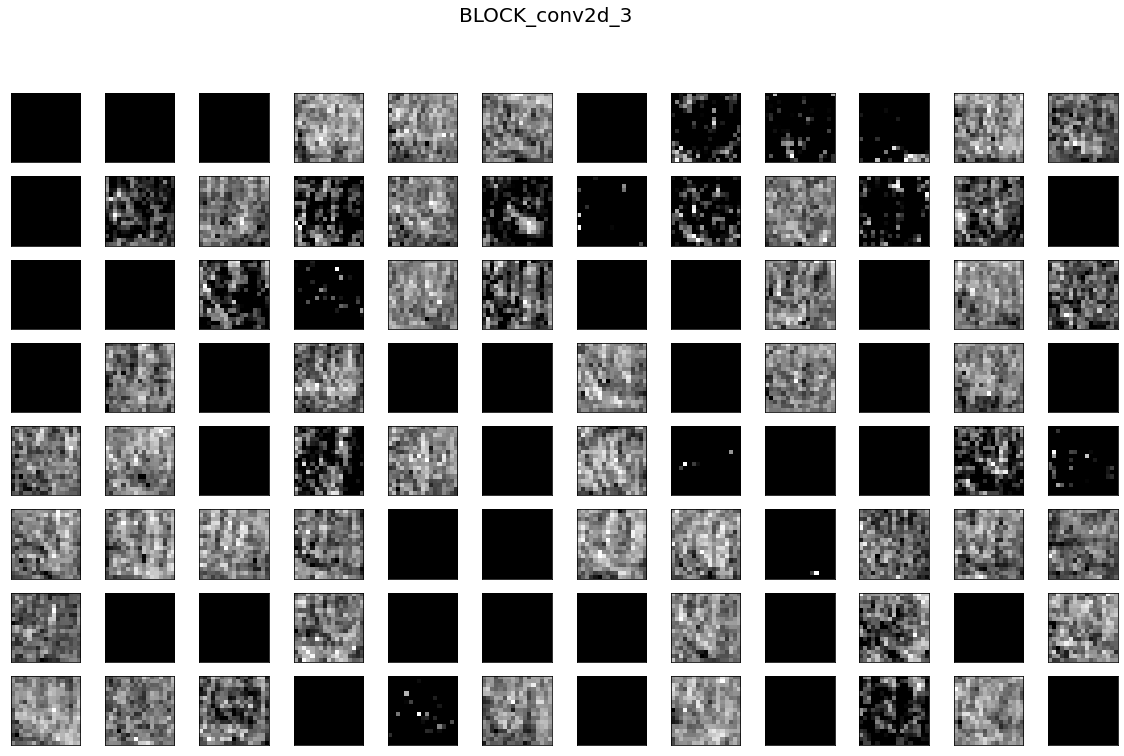

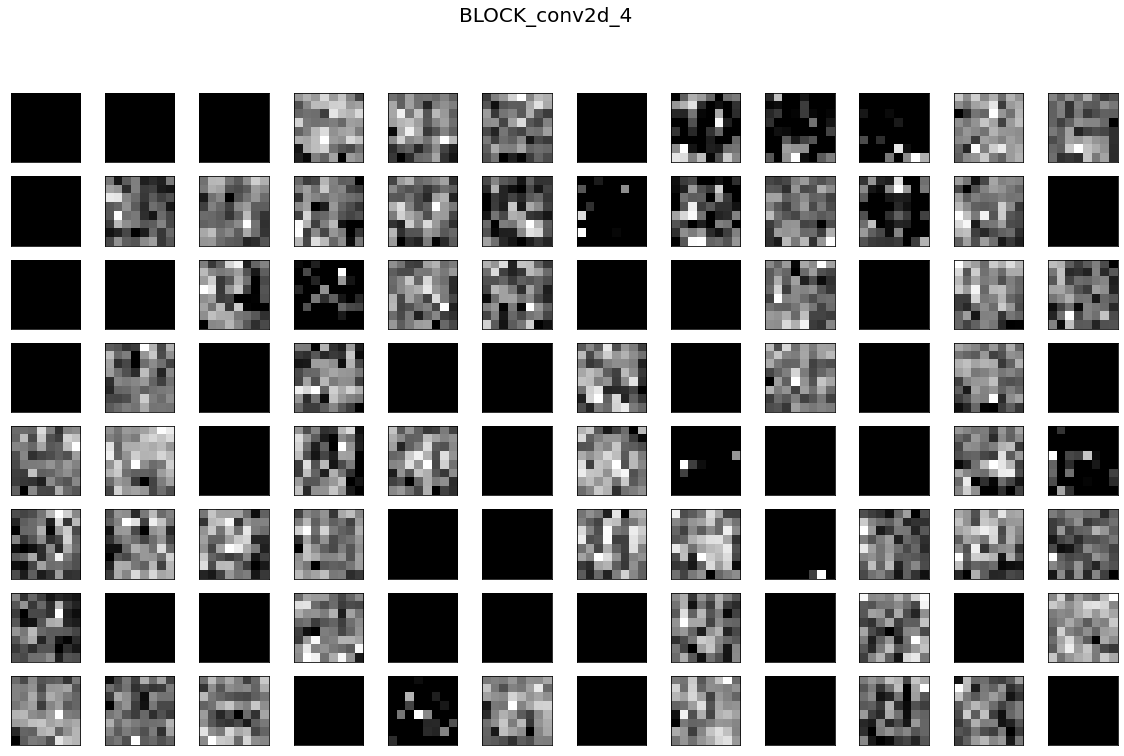

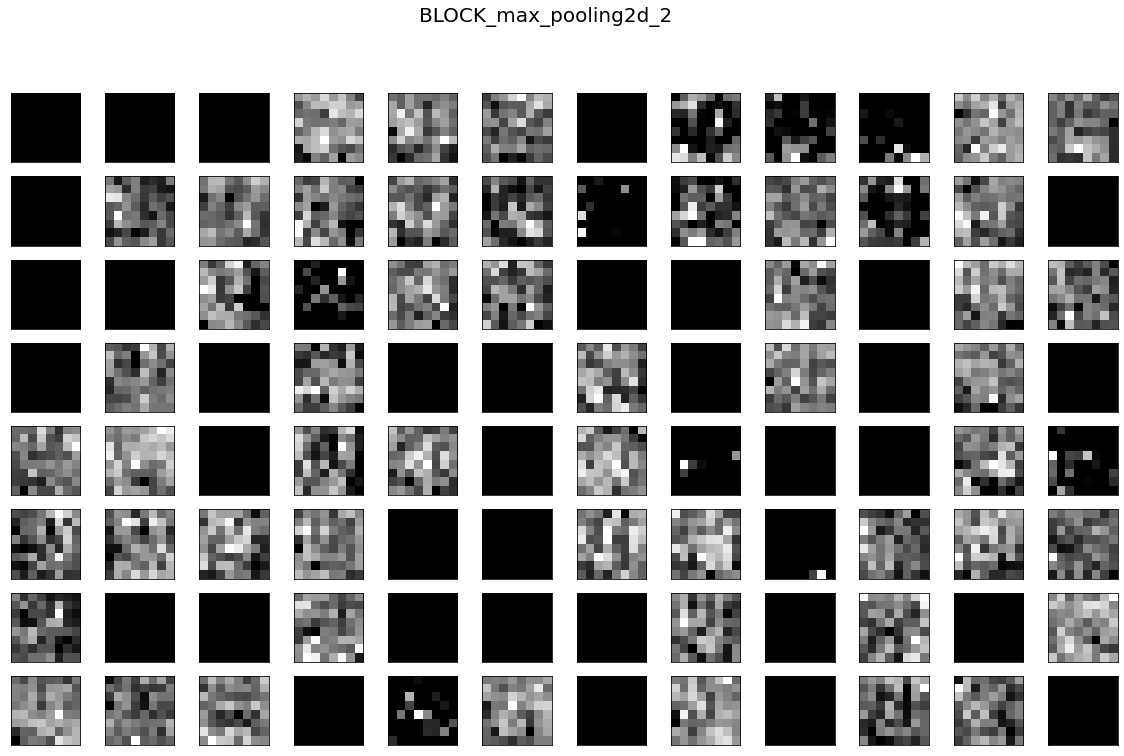

In [41]:
feature_maps = feature_map_model.predict(img)

for i, fmap in zip(layer_names, feature_maps):
  fig = plt.figure(figsize=(20,12))
  fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
  for i in range(1, features.shape[3]+1):
    plt.subplot(8,12,i)
    plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [24]:
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d is =======>> (1, 55, 55, 96)
The shape of the max_pooling2d is =======>> (1, 55, 55, 96)
The shape of the conv2d_1 is =======>> (1, 27, 27, 96)
The shape of the max_pooling2d_1 is =======>> (1, 27, 27, 96)
The shape of the conv2d_2 is =======>> (1, 17, 17, 256)
The shape of the conv2d_3 is =======>> (1, 17, 17, 256)
The shape of the conv2d_4 is =======>> (1, 8, 8, 256)
The shape of the max_pooling2d_2 is =======>> (1, 8, 8, 256)


#### Training and testing

In [ ]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=5, validation_data=(X_test, Y_test), batch_size=2) # batch size = how many images will train per time

Epoch 1/5
1511/1511 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1698

**I am using google colab and I couldn't train this dataset completely with alexnet architecture due to memory restrictions.**

## **Using VGG19**

Image resizing

In [7]:
train_data = []

for c in CATEGORIES:
    path = os.path.join(DATA_DIR, c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (32, 32))
            train_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(train_data))

100%|██████████| 764/764 [00:12<00:00, 59.14it/s] 

4317


Visualizing data after resizing

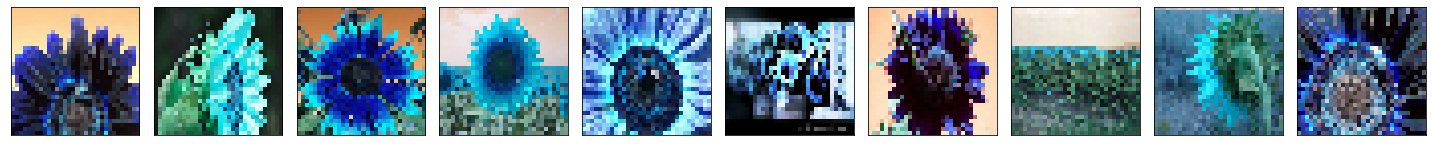

In [8]:
i = 0
plt.figure(figsize=(20, 8))
for img in train_data:
  plt.subplot(1,10,i+1)
  plt.imshow(img[0])
  plt.xticks([])
  plt.yticks([])
  i += 1
  if i%10 == 0:
      break

plt.tight_layout()        
plt.show()

Shuffling data to reduce overfitting

In [9]:
random.shuffle(train_data)

Differentiating image array and labels

In [10]:
x = []
y = []

for img, label in train_data:
    x.append(img)
    y.append(label)
    
x = np.array(x).astype('float32').reshape(-1, 32, 32, 3)
y = np.array(y)

print(f"x= {x.shape} y= {y.shape}")

x= (4317, 32, 32, 3) y= (4317,)


Splitting all images into train, validation and test sets

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

#### Image preprocessing and model creating

In [12]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[ 77.0261   107.25618  117.194565]


In [13]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [14]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

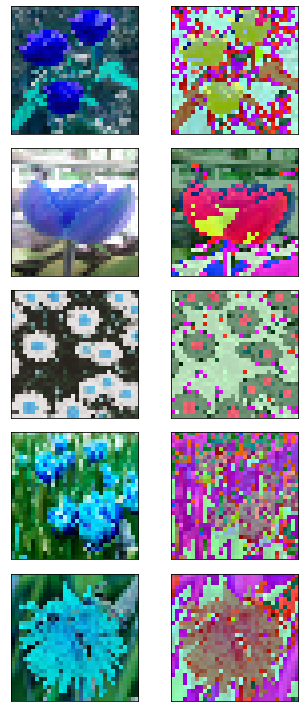

In [15]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

Defining **vgg19** model

In [16]:
model = keras.Sequential([
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                        

Compiling the model

In [17]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.000001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

Filter Visualization

In [18]:
layer = model.layers
filters, biases = layer[0].get_weights()
print(layer[0].name, filters.shape)

conv2d (3, 3, 3, 64)


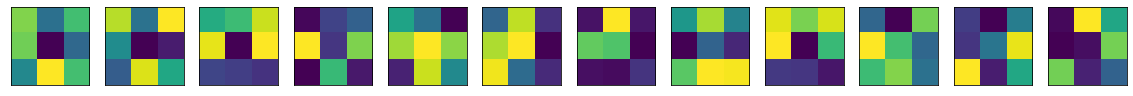

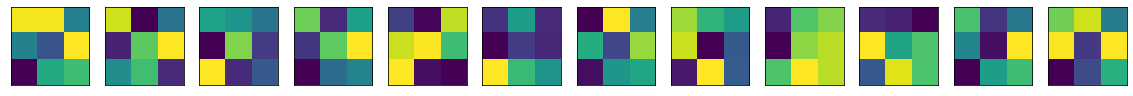

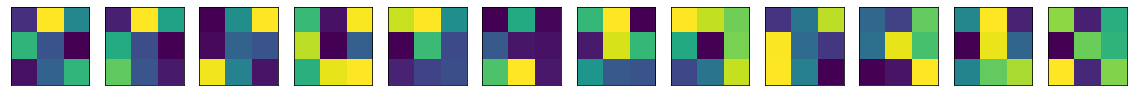

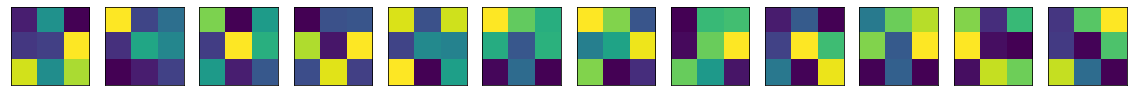

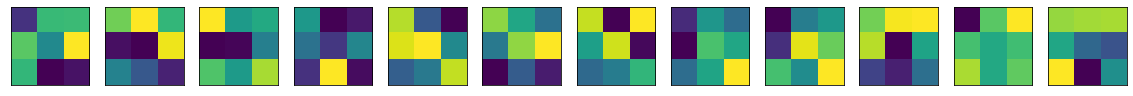

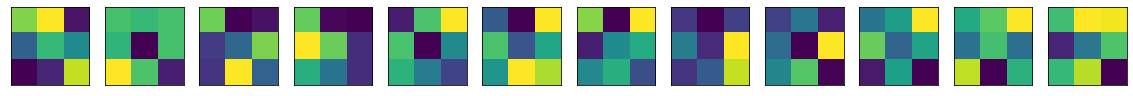

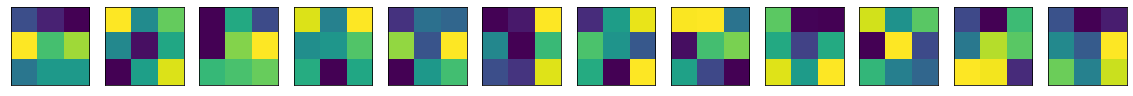

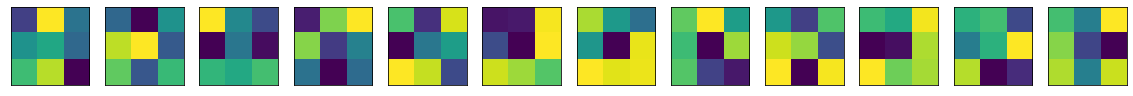

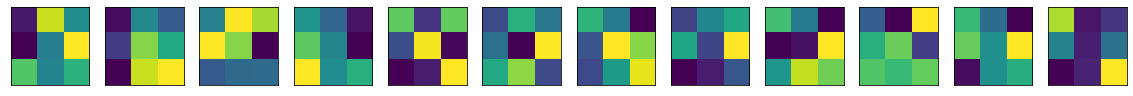

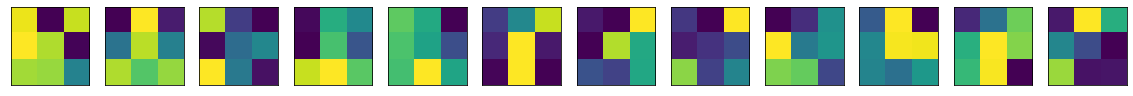

In [19]:
columns = 12
rows = 1
n_filters = columns * rows
for l in range(len(layer)):
    if "conv2d" in layer[l].name:
        filters, biases = layer[l].get_weights()
        fig1 = plt.figure(figsize=(20, 8))
        for i in range(1, n_filters + 1):
            f = filters[:, :, :, i-1]
            fig1 = plt.subplot(rows, columns, i)
            fig1.set_xticks([])
            fig1.set_yticks([])
            plt.imshow(f[:, :, 0])
        plt.show()

#### Layer Visualization

In [21]:
layer = model.layers
layer_names = []
for l in range(len(layer)):
    if "max" in layer[l].name or "conv2d" in layer[l].name:
      layer_names.append(layer[l].name)
        
layer_outputs = [layer.output for layer in model.layers]
print(layer_outputs)

[<KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'activation')>, <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 32, 32, 64) dtype=float32 (created by layer 'activation_1')>, <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'activation_2')>, <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'conv2d_3')>, <KerasTensor: shape=(None, 16, 16, 128) dtype=float32 (created by layer 'activation_3')>, <KerasTensor: shape=(None, 8, 8, 128) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 8, 8, 256) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 8, 8, 256) 

In [22]:
model_short = keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)

In [23]:
feature_map_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)

In [24]:
from keras.preprocessing.image import load_img, img_to_array

img = load_img("/content/drive/My Drive/flowers/rose/145862135_ab710de93c_n.jpg", target_size=(32, 32))
img = img_to_array(img)
img = np.array(img).astype('float32').reshape(-1, 32, 32, 3)
img /= 255.0
print(type(img))  
print(img.shape)                       

# plt.imshow(img)

<class 'numpy.ndarray'>
(1, 32, 32, 3)


In [25]:
features = model_short.predict(img)
print(features.shape)

(1, 32, 32, 64)


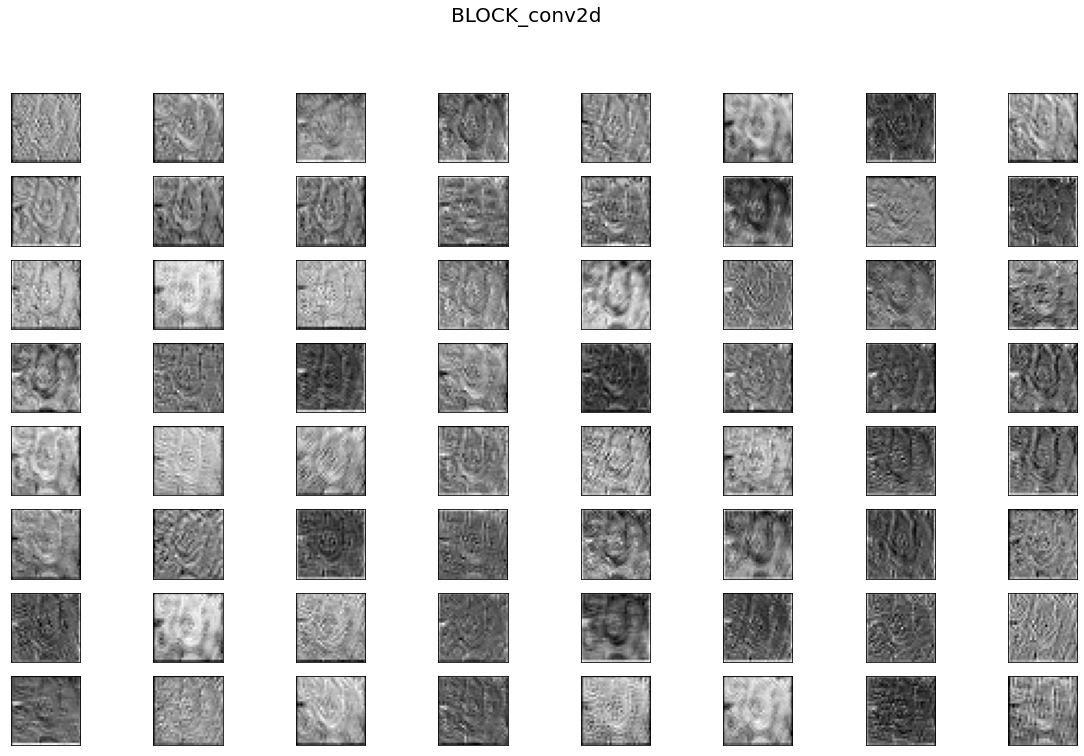

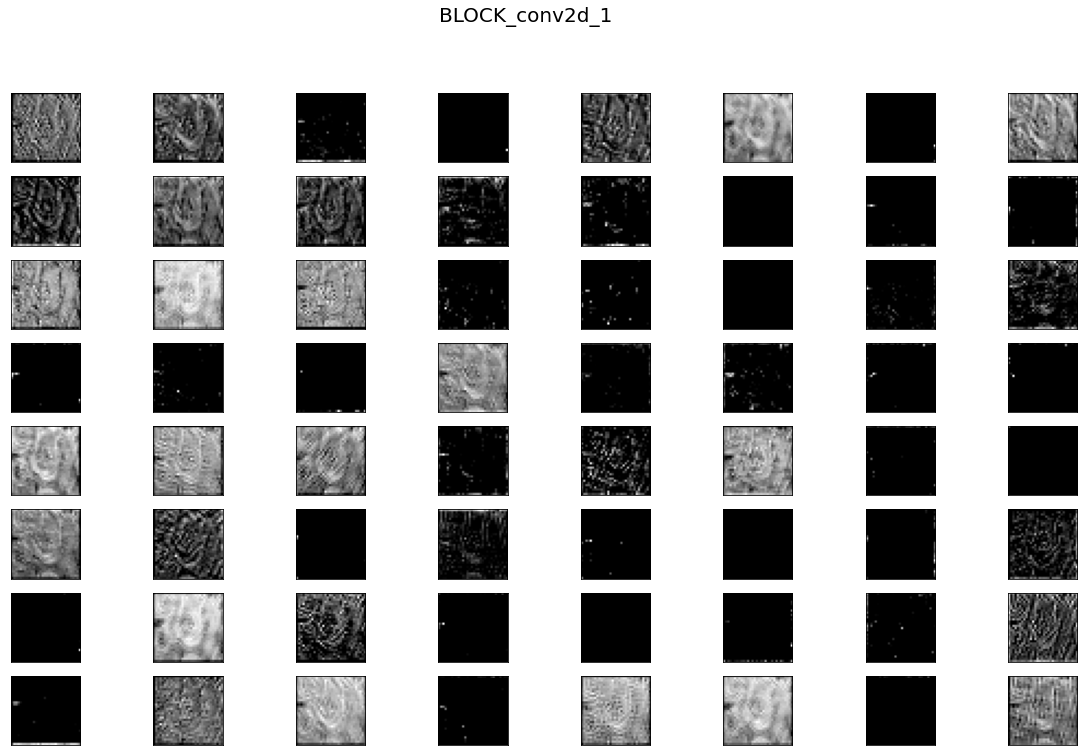

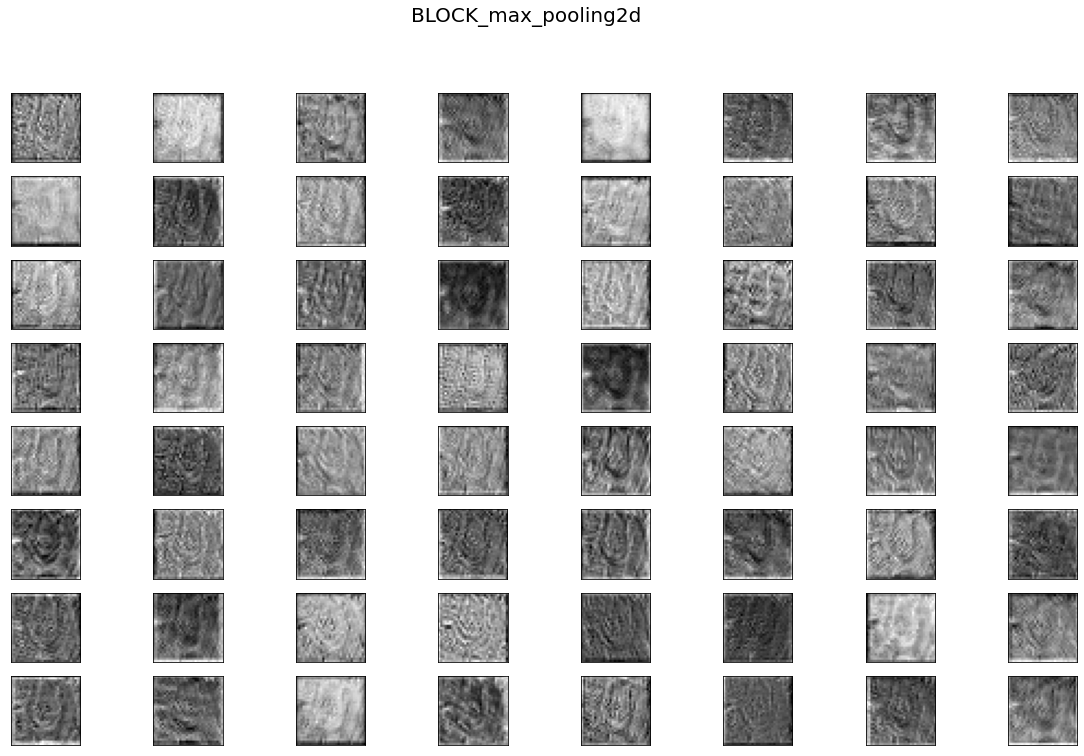

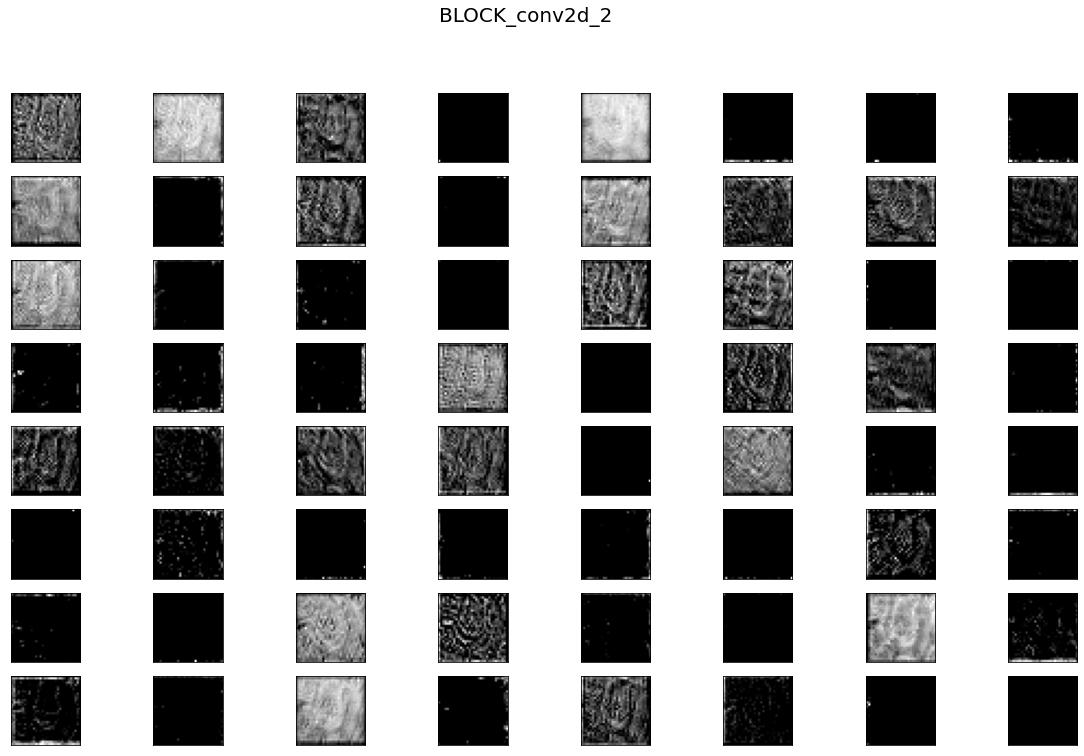

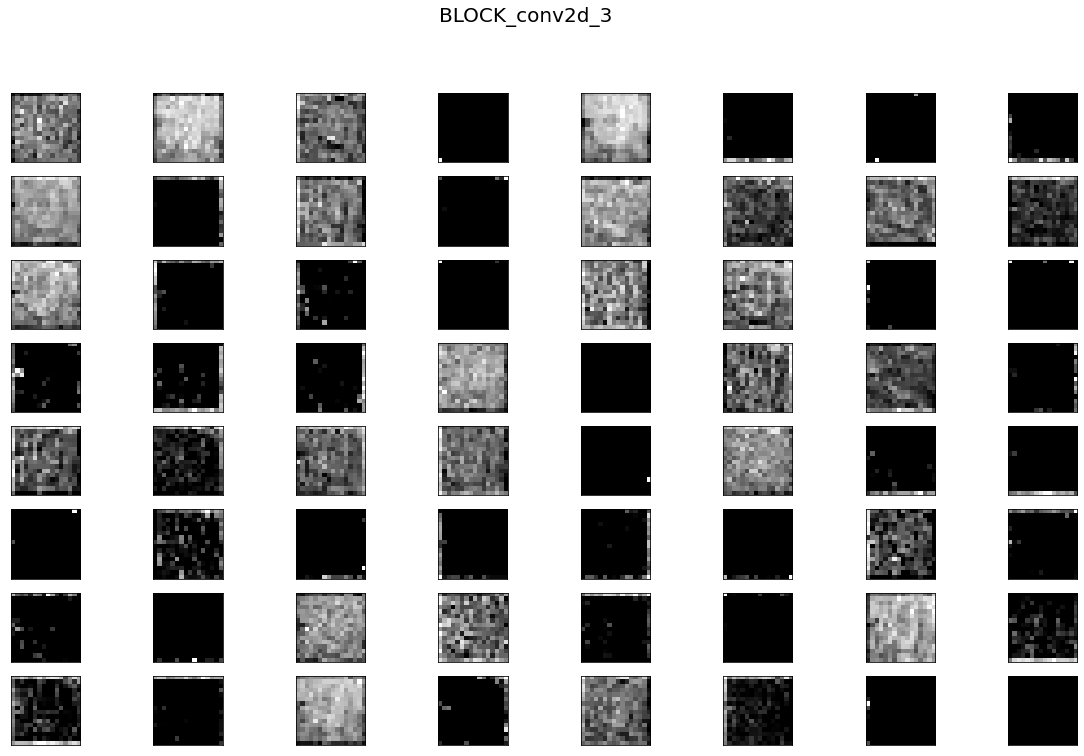

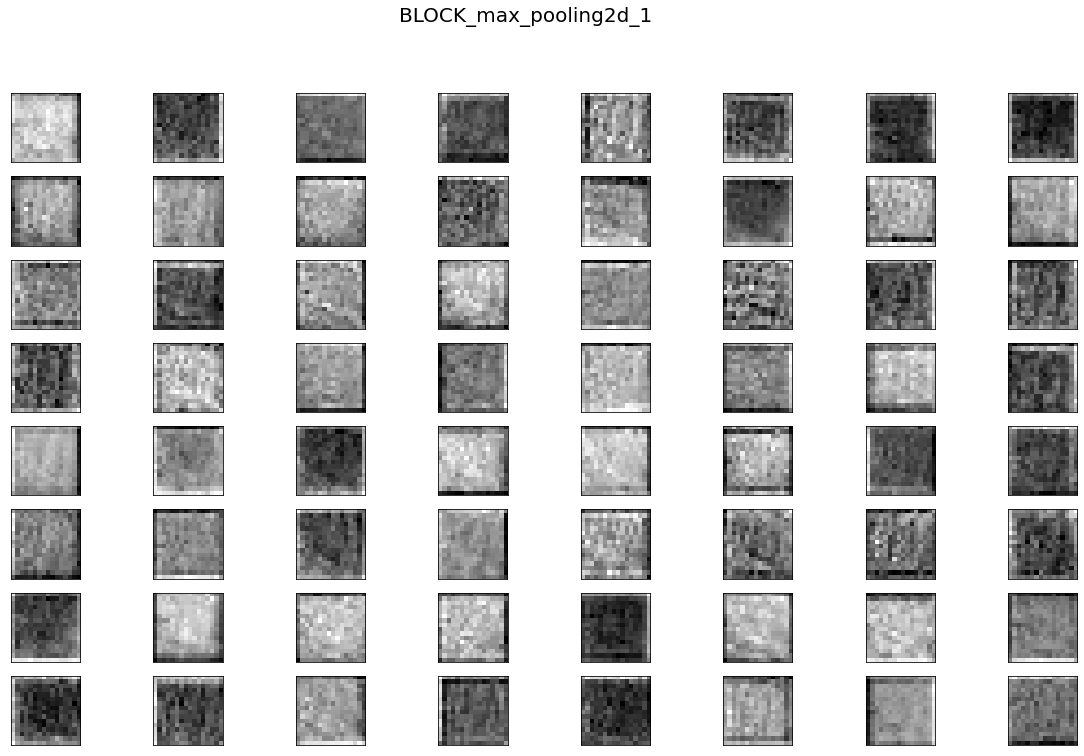

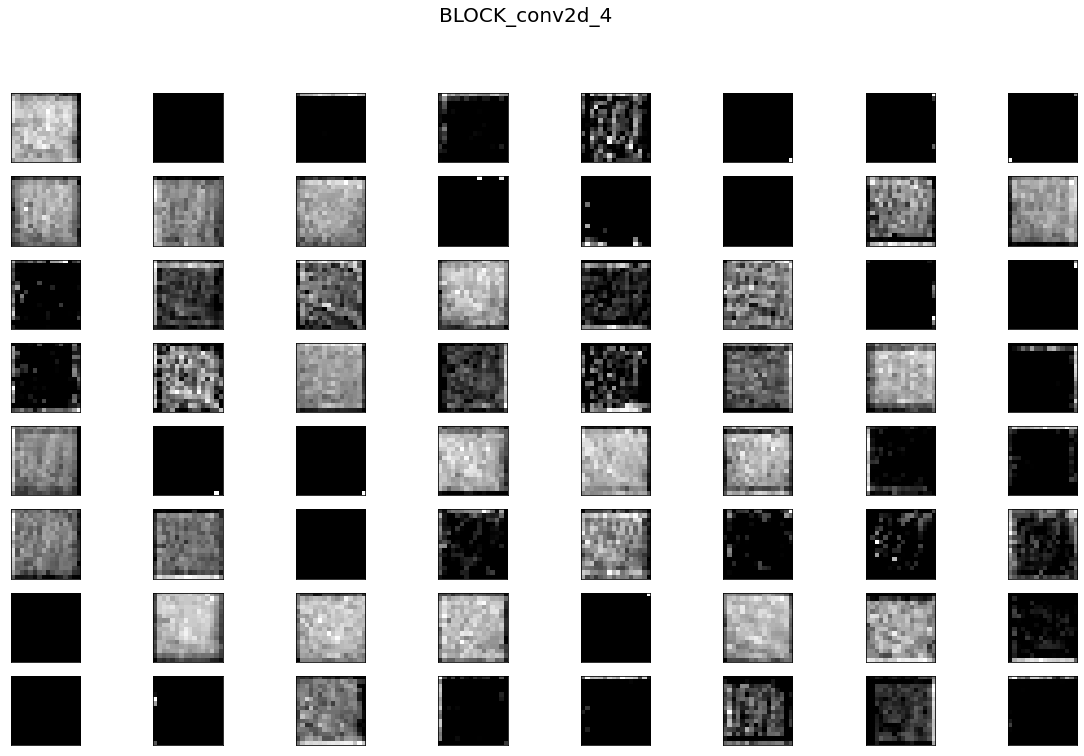

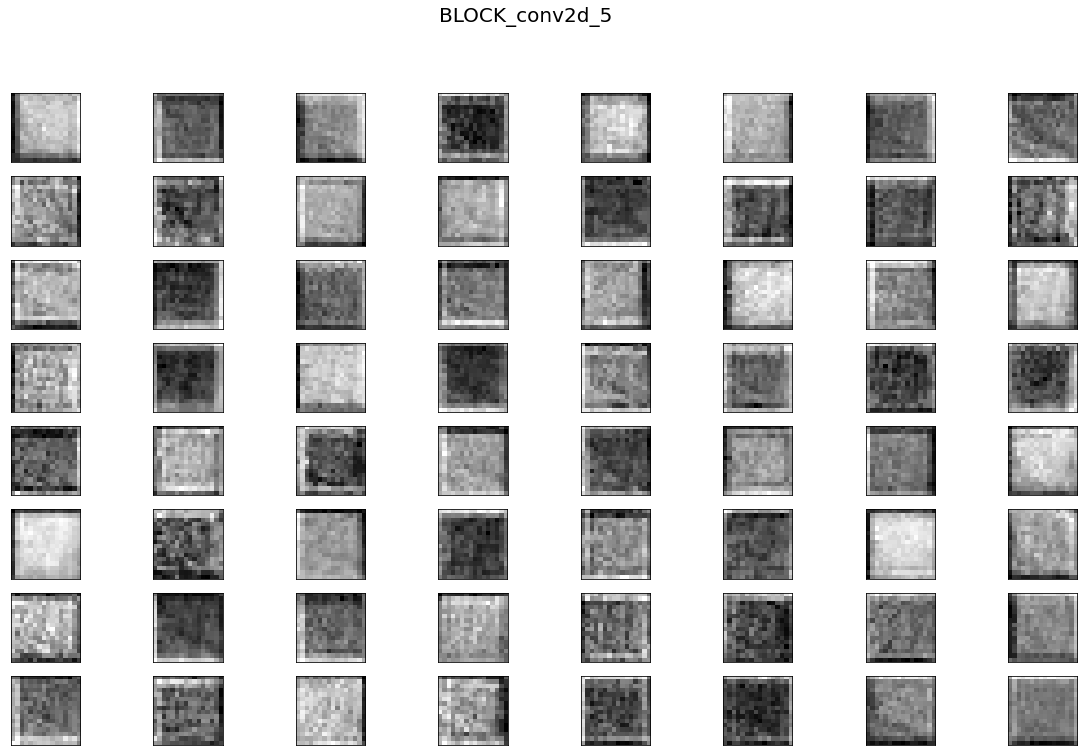

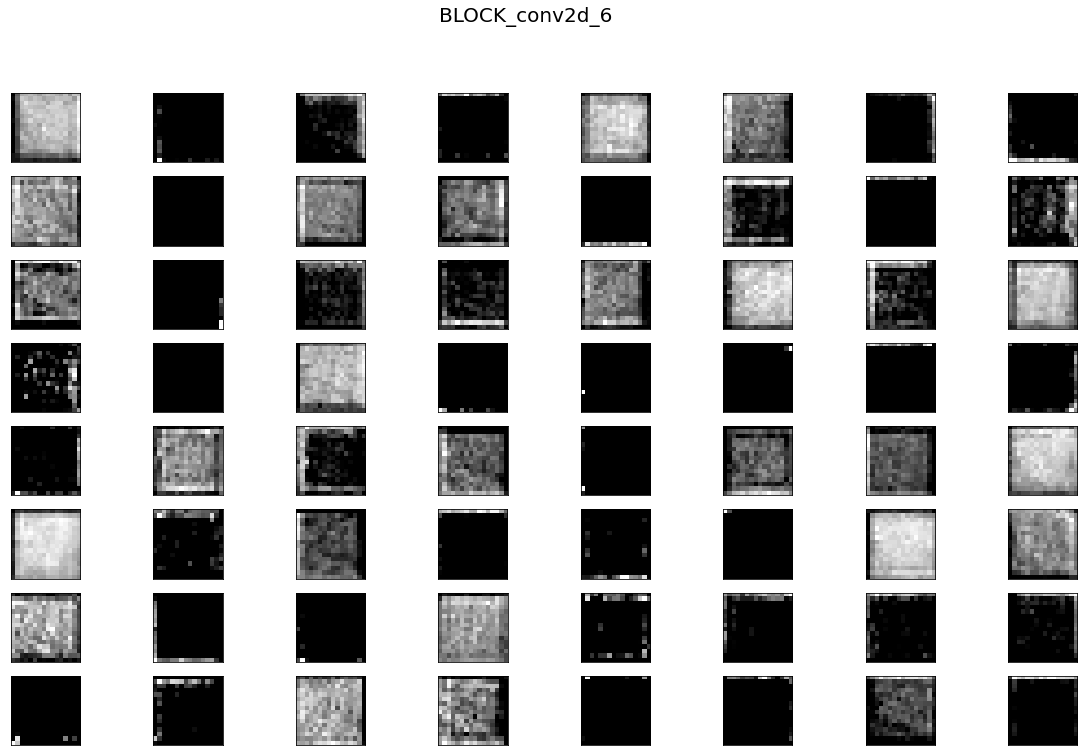

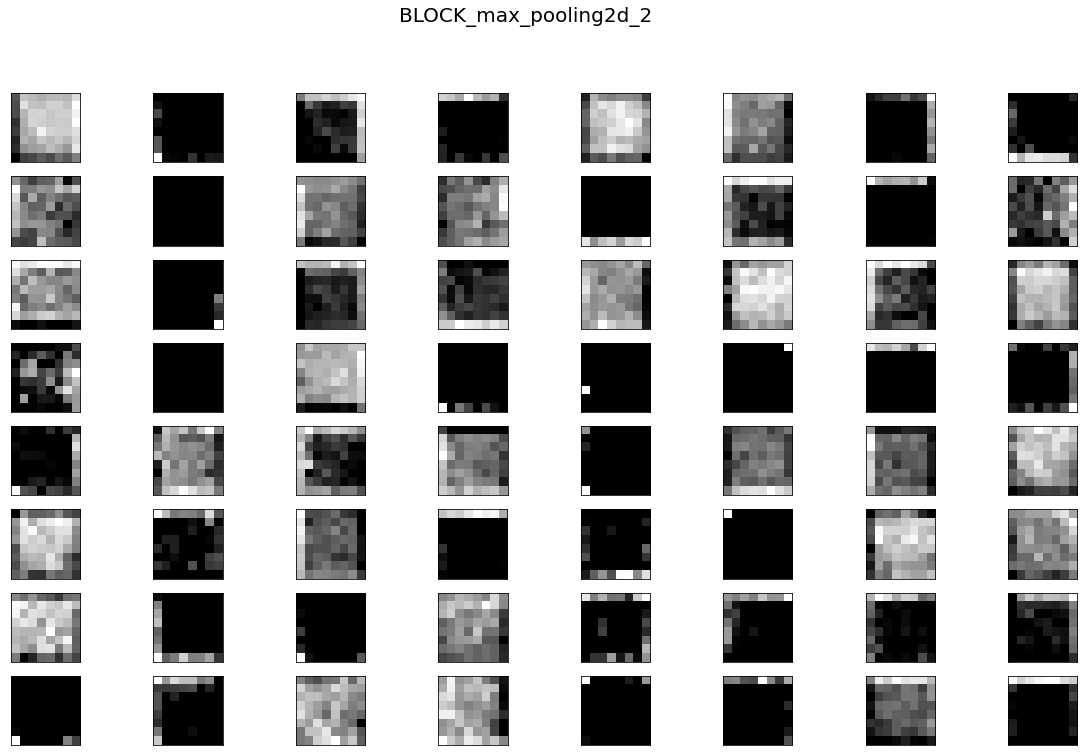

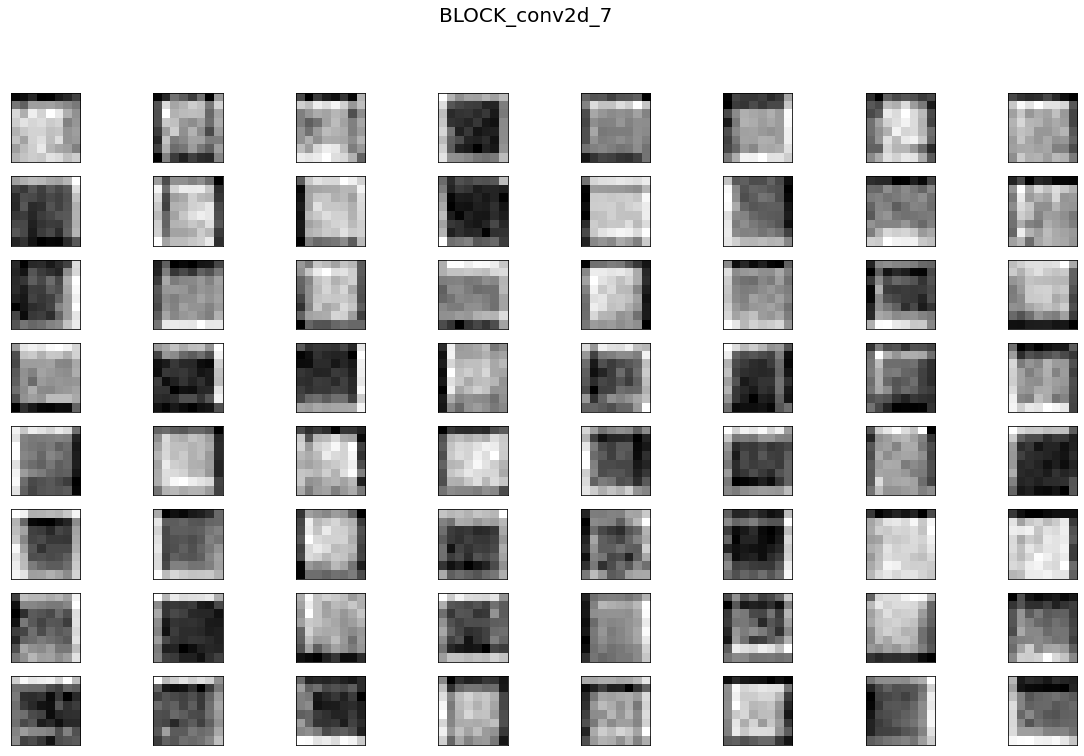

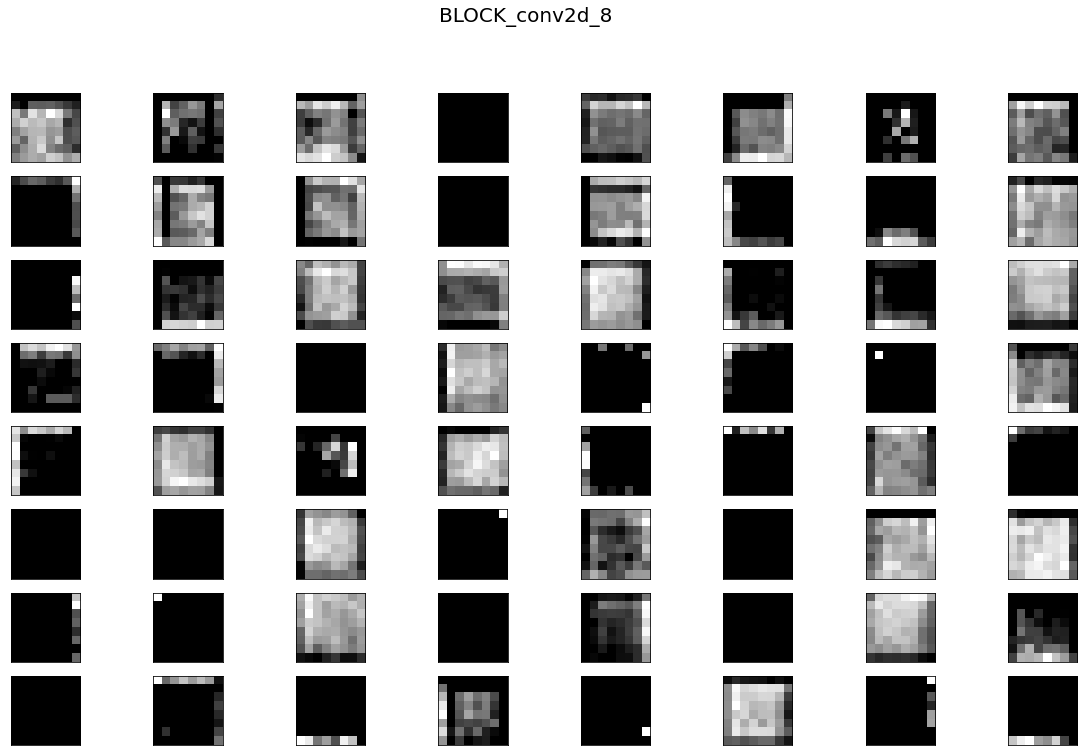

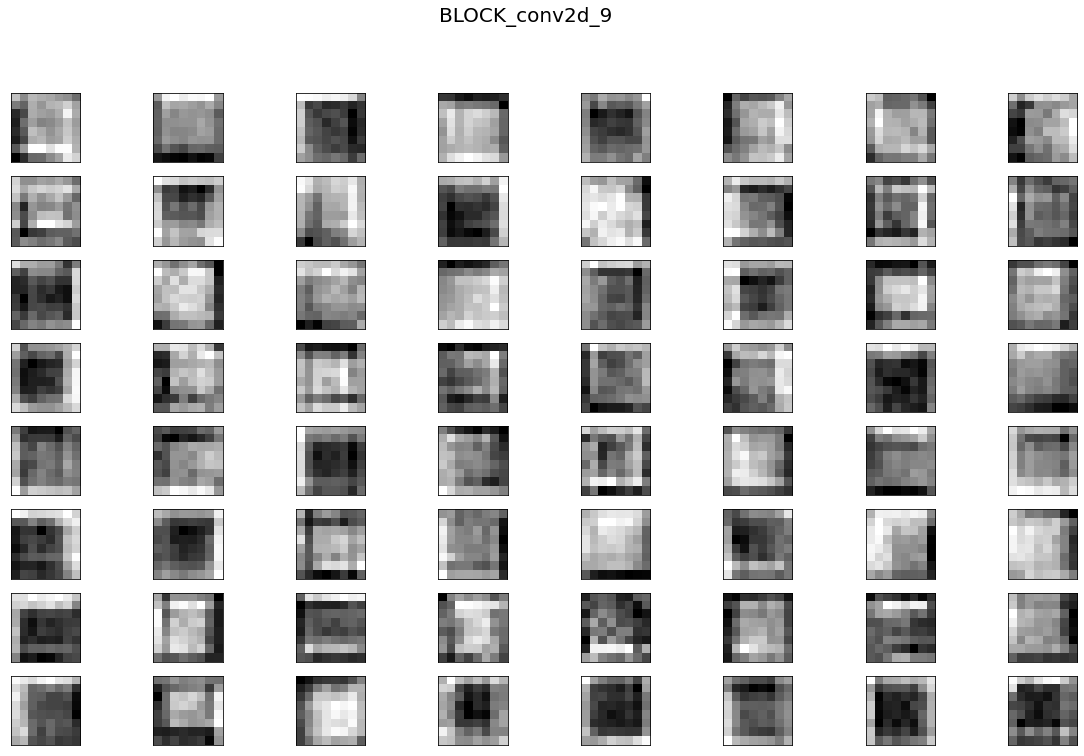

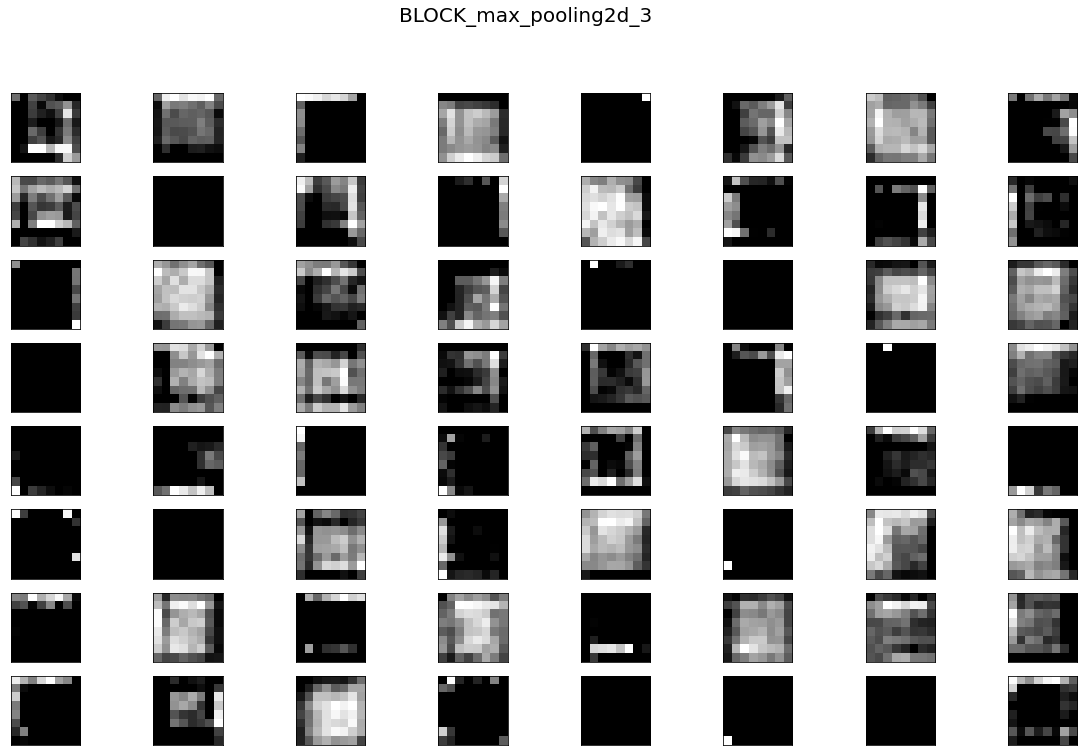

In [26]:
feature_maps = feature_map_model.predict(img)

for i, fmap in zip(layer_names, feature_maps):
  fig = plt.figure(figsize=(20,12))
  fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
  for i in range(1, features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(fmap[0,:,:,i-1] , cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

#### Training and Testing

In [96]:
cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.02, patience=15, restore_best_weights=True)
h = model.fit(x=X_train_norm, y=Y_train, epochs=200, validation_split=0.2, batch_size=256, callbacks=[cb]) # batch size = how many images will train per time

Epoch 1/200
11/11 [==============================] - 4s 215ms/step - loss: 2.6566 - accuracy: 0.0905 - val_loss: 2.2791 - val_accuracy: 0.1896
Epoch 2/200
11/11 [==============================] - 2s 173ms/step - loss: 2.4211 - accuracy: 0.1343 - val_loss: 2.1194 - val_accuracy: 0.2272
Epoch 3/200
11/11 [==============================] - 2s 172ms/step - loss: 2.2691 - accuracy: 0.1676 - val_loss: 2.0033 - val_accuracy: 0.2330
Epoch 4/200
11/11 [==============================] - 2s 171ms/step - loss: 2.1539 - accuracy: 0.1904 - val_loss: 1.9135 - val_accuracy: 0.2344
Epoch 5/200
11/11 [==============================] - 2s 172ms/step - loss: 2.0622 - accuracy: 0.2038 - val_loss: 1.8407 - val_accuracy: 0.2330
Epoch 6/200
11/11 [==============================] - 2s 171ms/step - loss: 1.9987 - accuracy: 0.2151 - val_loss: 1.7852 - val_accuracy: 0.2417
Epoch 7/200
11/11 [==============================] - 2s 172ms/step - loss: 1.9298 - accuracy: 0.2219 - val_loss: 1.7437 - val_accuracy: 0.2518

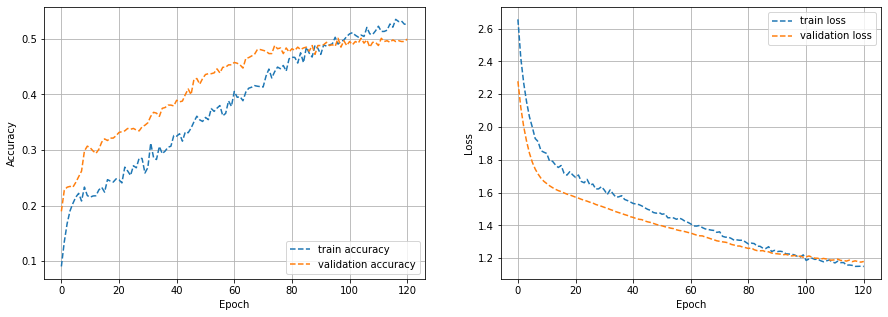

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [98]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

27/27 [==============================] - 1s 13ms/step - loss: 1.1647 - accuracy: 0.5370

Test Accuracy: 0.5370370149612427

Test Loss: 1.1647366285324097


In [99]:
model.save('/content/drive/My Drive/vgg19.h5')